# Imports 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, neighbors


In [4]:
#df = pd.read_csv(r'C:\Users\elaaf\Desktop\SDS\project_3_original_data\BitcoinHeistData.csv')
df = pd.read_csv("/Users/muntaha/Documents/BitcoinHeistData.csv")

In [5]:
df.shape

(2916697, 10)

In [6]:
df.info(null_counts=True)

<ipython-input-6-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [7]:
len(df.address.unique()) #the address is not unique

2631095

<AxesSubplot:>

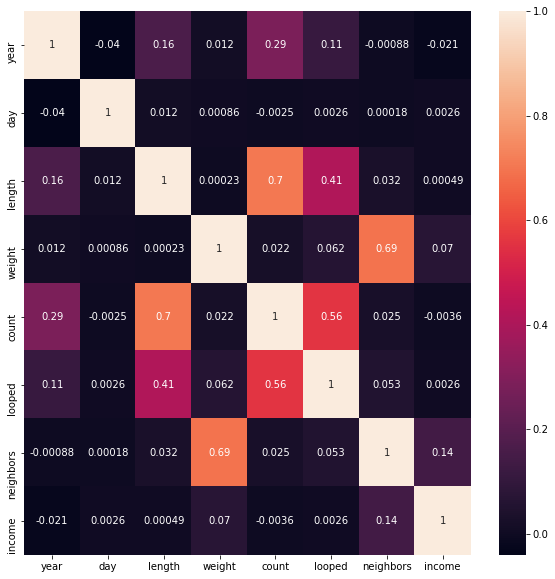

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [8]:
unique_label = list(set(df.label))

In [9]:

d = {}

for i in unique_label:
    if i != 'white':
        d[i] = 1
    else:
        d[i] = 0


In [10]:
d

{'montrealXTPLocker': 1,
 'paduaKeRanger': 1,
 'montrealRazy': 1,
 'montrealDMALockerv3': 1,
 'montrealFlyper': 1,
 'montrealSam': 1,
 'paduaJigsaw': 1,
 'montrealDMALocker': 1,
 'montrealGlobev3': 1,
 'montrealNoobCrypt': 1,
 'montrealCryptoLocker': 1,
 'white': 0,
 'princetonCerber': 1,
 'montrealJigSaw': 1,
 'montrealWannaCry': 1,
 'montrealCryptConsole': 1,
 'paduaCryptoWall': 1,
 'montrealGlobe': 1,
 'montrealSamSam': 1,
 'montrealXLocker': 1,
 'montrealComradeCircle': 1,
 'montrealGlobeImposter': 1,
 'montrealCryptoTorLocker2015': 1,
 'montrealEDA2': 1,
 'montrealCryptXXX': 1,
 'montrealAPT': 1,
 'montrealXLockerv5.0': 1,
 'princetonLocky': 1,
 'montrealVenusLocker': 1}

In [11]:
df.label.replace(d, inplace=True)

<AxesSubplot:ylabel='address'>

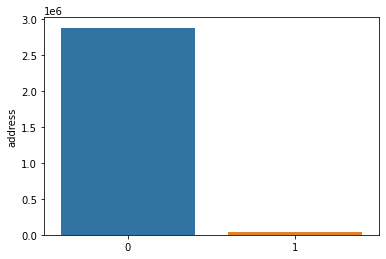

In [13]:
labels_dist = df.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist, x = [0,1])

In [14]:
labels_dist

label
0    2875284
1      41413
Name: address, dtype: int64

In [15]:
df.info(null_counts=True)

<ipython-input-15-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


In [16]:
#sns.pairplot(df) 

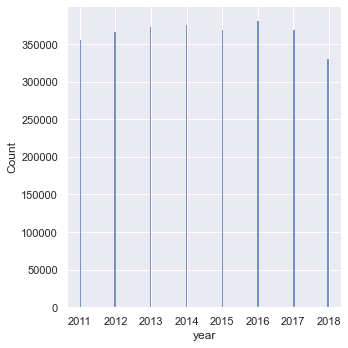

In [25]:
sns.set(rc={'figure.figsize':(30,30)})
sns.displot(df, x="year",linewidth = 0.01);

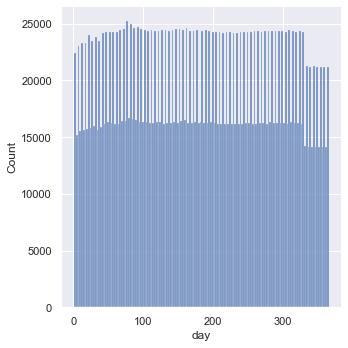

In [26]:
sns.displot(df, x="day")

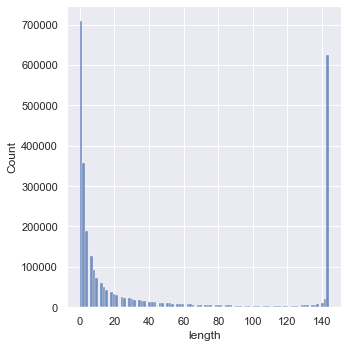

In [27]:
sns.displot(df, x="length")

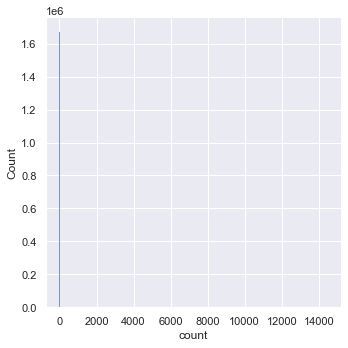

In [28]:
sns.displot(df, x="count")

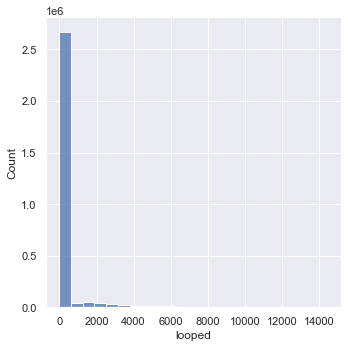

In [29]:
sns.displot(df, x="looped")

In [30]:
#sns.displot(df, x="neighbors")

In [31]:
#sns.displot(df, x="income")

### Smaller subset of the data

In [17]:
df_1 = df[(df['label']==1)]

In [18]:
df_1.shape

(41413, 10)

In [19]:
df_1.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,41413.000000,41413.000000,41413.000000,4.141300e+04,41413.000000,41413.000000,41413.000000,4.141300e+04,41413.0
mean,2014.876923,174.439741,41.636926,6.274532e-01,599.810277,95.100645,2.076256,7.833721e+08,1.0
std,1.361243,94.700239,58.442350,2.667625e+00,1419.955449,525.423306,2.401167,1.423362e+10,0.0
min,2011.000000,1.000000,0.000000,4.719723e-42,1.000000,0.000000,1.000000,3.000000e+07,1.0
25%,2014.000000,90.000000,0.000000,6.250000e-02,1.000000,0.000000,1.000000,8.000000e+07,1.0
50%,2015.000000,160.000000,6.000000,3.880441e-01,1.000000,0.000000,2.000000,1.250000e+08,1.0
75%,2016.000000,260.000000,80.000000,1.000000e+00,15.000000,0.000000,2.000000,3.000000e+08,1.0
max,2018.000000,365.000000,144.000000,4.982885e+02,13462.000000,11693.000000,94.000000,2.595000e+12,1.0


In [20]:
df_2 = df[(df['label']==0)].sample(n=41413, random_state=42)

In [21]:
df_2.shape

(41413, 10)

In [22]:
df_2.describe()

,year,day,length,weight,count,looped,neighbors,income,label
count,41413.000000,41413.000000,41413.000000,4.141300e+04,41413.000000,41413.000000,41413.000000,4.141300e+04,41413.0
mean,2014.469080,182.330500,44.147538,5.861829e-01,717.606355,240.033275,2.414121,3.816353e+09,0.0
std,2.270584,104.431949,58.681944,9.423326e+00,1698.990105,966.557317,58.450442,7.154849e+10,0.0
min,2011.000000,1.000000,0.000000,6.493017e-80,1.000000,0.000000,1.000000,3.000000e+07,0.0
25%,2012.000000,92.000000,2.000000,2.371412e-02,1.000000,0.000000,1.000000,7.466611e+07,0.0
50%,2014.000000,183.000000,8.000000,2.500000e-01,1.000000,0.000000,2.000000,2.000000e+08,0.0
75%,2016.000000,272.000000,98.000000,9.062500e-01,53.000000,0.000000,2.000000,1.000000e+09,0.0
max,2018.000000,365.000000,144.000000,1.866717e+03,14494.000000,13833.000000,11746.000000,1.067816e+13,0.0


In [23]:
df_new = pd.concat([df_1, df_2])

<AxesSubplot:ylabel='address'>

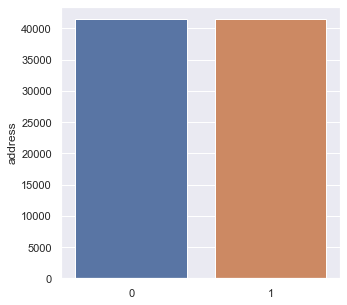

In [39]:
sns.set(rc={'figure.figsize':(5,5)})
labels_dist_ = df_new.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist_, x = [0,1])

In [24]:
# sns.pairplot(df_new, hue='label');

In [ ]:
#sns.pairplot(df_new);

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df_new.corr(), annot=True);

### Fitting the model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns=['label','address']), df_new['label'], 
                                                    test_size = 0.25, random_state=42)

In [26]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 50.0 %
Confusion Matrix:
 [[10339     0]
 [10368     0]]


In [28]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.0 
Recall =  0.0 
F-Score =  0.0


/Users/muntaha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [30]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [31]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 60.0 %
Confusion Matrix:
 [[5809 4530]
 [3741 6627]]


In [32]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.594 
Recall =  0.6392 
F-Score =  0.6157


In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [34]:
classifier = SGDClassifier(loss='log', max_iter=100) 
model = classifier.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is : 50.0 %
Confusion Matrix:
 [[7735 2604]
 [7653 2715]]


In [36]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

Precision =  0.5104 
Recall =  0.2619 
F-Score =  0.3461


In [37]:
#df_new.to_csv(r'C:\Users\elaaf\Desktop\SDS\Project_3\Data\BMT_balanced.csv')

# Pre-Processing

In [38]:
df_Temp = df.copy(deep=True)

In [39]:
#convert label to categorical - (Elaf)

In [40]:
#change address to numerical (preprocessing.LabelEncoder())
label_encoder = preprocessing.LabelEncoder()
df_Temp['address']=label_encoder.fit_transform(df_Temp['address'])
df_Temp.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,23,2017,11,18,0.008333,1,0,2,100050000.0,1
1,128,2016,132,44,0.000244,1,0,1,100000000.0,1
2,169,2016,246,0,1.000000,1,0,2,200000000.0,1
3,217,2016,322,72,0.003906,1,0,2,71200000.0,1
4,293,2016,238,144,0.072848,456,0,1,200000000.0,1


In [41]:
#Median Encoding (Except day and year) - (Elaf)

In [42]:
#Mean Encoding (Except day and year)


# Handle Unbalanced Data

# EDA

### Balanced Data 

<AxesSubplot:>

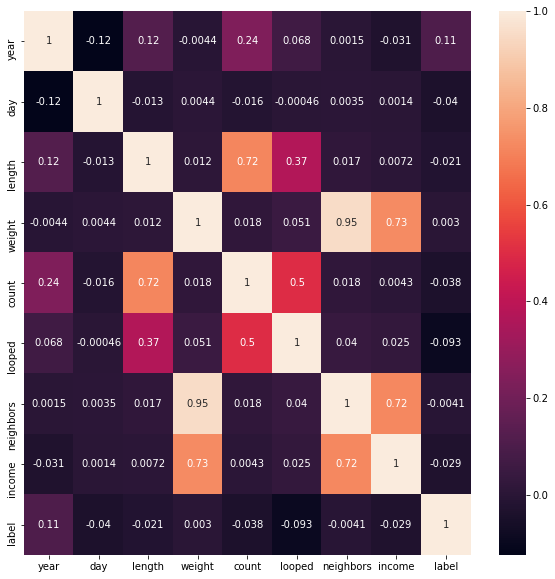

In [43]:
# Heat Map
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True)

In [ ]:
# pairplot
sns.pairplot(df_new, hue='label');

In [49]:
# Distribution


In [50]:
#Label count


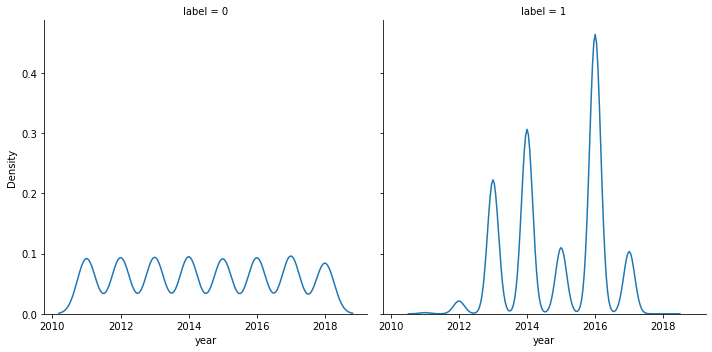

In [55]:
#Ransomware and white distribution over years 
sns.displot(data=df_new, x="year", col="label", kind="kde");

### SVM model

In [78]:
# Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [79]:
# work on Balanced DATA (Random sampling)
model = SVC(kernel='rbf', random_state = 2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

In [ ]:
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nSVM Accuracy: ", accuracy)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

In [ ]:
model = model.fit(X_train_scaled, y_train)
y_pred_ = model.predict(X_test_scaled)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

In [ ]:
cm = confusion_matrix(y_test,y_pred_)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nSVM Accuracy: ", accuracy)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_)
conf_mat = confusion_matrix(y_test,y_pred_)
print("The accuracy of the model is :", round(accuracy,2)*100,"%")
print("Confusion Matrix:\n", conf_mat)

In [ ]:
model.score(X_test,y_test)

### Random Forest model

In [ ]:
# work on Balanced DATA (Random sampling)
model = RandomForestClassifier(max_depth=3,random_state=2)

In [ ]:
model = model.fit(X_train,y_kktrain)

In [ ]:
model.score(X_test,y_test)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, Y_pred, average='binary')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

# Different Scales

In [ ]:
# 

# All Models

In [ ]:
# Create Function to fit on All models and Calculat it's score, F1, Prec, Recall ... etc. 